In [23]:
import pandas as pd

file_path = 'adult22.csv'
df = pd.read_csv(file_path)

selected_columns = ['BMICAT_A', 'FRJUICTP_A', 'COFFEENOTP_A', 'SALADTP_A', 'FRIESTP_A', 'BEANSTP_A', 'PIZZATP_A', 'OVEGTP_A']
df_selected = df[selected_columns]

df_selected = df_selected[~df_selected['BMICAT_A'].isin([9])]
df_selected = df_selected[~df_selected['FRJUICTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['COFFEENOTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['SALADTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['FRIESTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['BEANSTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['PIZZATP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['OVEGTP_A'].isin([7, 8, 9])]

# print(df_selected['BMICAT_A'])
# df_selected['BMICAT_A'].replace({2: 0}, inplace=True)
df_selected['BMICAT_A'].replace({1: 0, 2: 1, 3: 2, 4: 3}, inplace=True)
# print(df_selected['BMICAT_A'])


df_selected.replace({
    'FRJUICTP_A': {1: 3, 3: 1},
    'COFFEENOTP_A': {1: 3, 3: 1},
    'SALADTP_A': {1: 3, 3: 1},
    'FRIESTP_A': {1: 3, 3: 1},
    'BEANSTP_A': {1: 3, 3: 1},
    'PIZZATP_A': {1: 3, 3: 1},
    'OVEGTP_A': {1: 3, 3: 1},
}, inplace=True)

X = df_selected.drop(columns=['BMICAT_A'])
y = df_selected['BMICAT_A']

0        2
1        4
2        4
3        4
4        3
        ..
27646    3
27647    2
27648    2
27649    4
27650    3
Name: BMICAT_A, Length: 25815, dtype: int64
0        1
1        3
2        3
3        3
4        2
        ..
27646    2
27647    1
27648    1
27649    3
27650    2
Name: BMICAT_A, Length: 25815, dtype: int64


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {title}')
    plt.show()

def plot_feature_importance(importance_df, title):
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Feature Importance: {title}')
    plt.show()
    
    
def plot_kmeans_clusters(X_test, y_pred, title):
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'K-means Clusters: {title}')
    plt.show()

In [4]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# Descriptive Statistics

In [5]:
print(df_selected.describe())

           BMICAT_A    FRJUICTP_A  COFFEENOTP_A     SALADTP_A     FRIESTP_A  \
count  25815.000000  25815.000000  25815.000000  25815.000000  25815.000000   
mean       1.979895      1.001162      1.213209      1.757854      1.230370   
std        0.839451      1.077100      1.300519      0.865463      0.794803   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      0.000000      1.000000      1.000000   
50%        2.000000      1.000000      1.000000      2.000000      1.000000   
75%        3.000000      2.000000      3.000000      2.000000      2.000000   
max        3.000000      3.000000      3.000000      3.000000      3.000000   

          BEANSTP_A     PIZZATP_A      OVEGTP_A  
count  25815.000000  25815.000000  25815.000000  
mean       1.154871      1.047879      2.120860  
std        0.833855      0.651322      0.837102  
min        0.000000      0.000000      0.000000  
25%        1.000000      1.000000     

# Correlation Analysis

              BMICAT_A  FRJUICTP_A  COFFEENOTP_A  SALADTP_A  FRIESTP_A  \
BMICAT_A      1.000000   -0.018483     -0.017861  -0.043173   0.053043   
FRJUICTP_A   -0.018483    1.000000      0.094016   0.058689   0.128427   
COFFEENOTP_A -0.017861    0.094016      1.000000   0.062529   0.077467   
SALADTP_A    -0.043173    0.058689      0.062529   1.000000   0.025458   
FRIESTP_A     0.053043    0.128427      0.077467   0.025458   1.000000   
BEANSTP_A    -0.015254    0.119447      0.085183   0.141504   0.137009   
PIZZATP_A     0.026205    0.072093      0.048682   0.019331   0.319928   
OVEGTP_A     -0.061703    0.053722      0.051090   0.376301   0.017074   

              BEANSTP_A  PIZZATP_A  OVEGTP_A  
BMICAT_A      -0.015254   0.026205 -0.061703  
FRJUICTP_A     0.119447   0.072093  0.053722  
COFFEENOTP_A   0.085183   0.048682  0.051090  
SALADTP_A      0.141504   0.019331  0.376301  
FRIESTP_A      0.137009   0.319928  0.017074  
BEANSTP_A      1.000000   0.095335  0.138900  
PIZZ

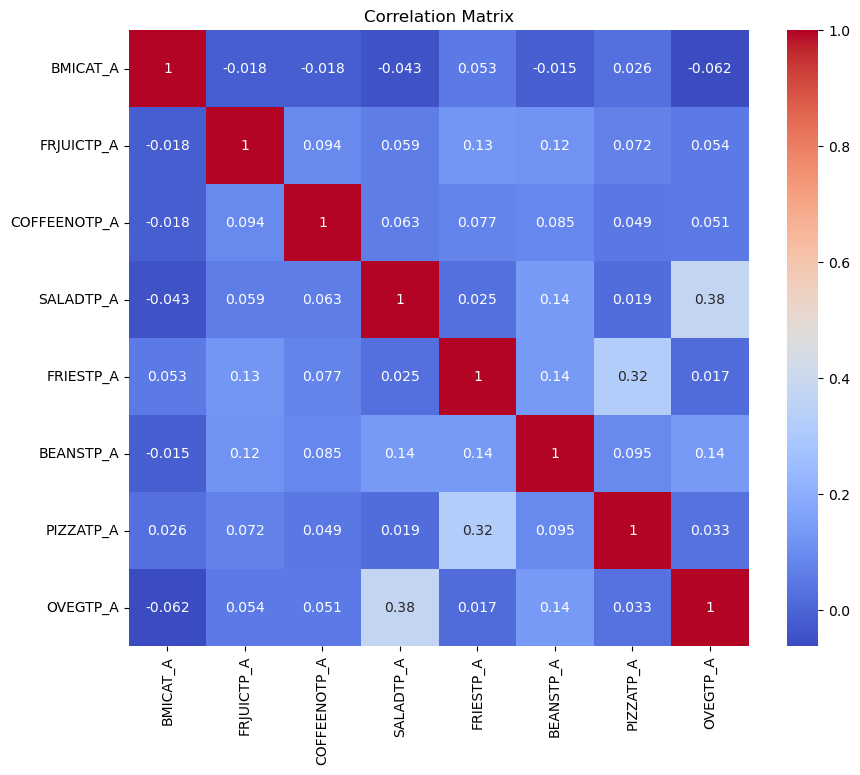

In [6]:
correlation_matrix = df_selected.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Hypothesis Testing

In [7]:
from scipy.stats import ttest_ind

heart_disease = df_selected[df_selected['BMICAT_A'] == 1]['FRJUICTP_A']
no_heart_disease = df_selected[df_selected['BMICAT_A'] == 0]['FRJUICTP_A']

t_stat, p_value = ttest_ind(heart_disease, no_heart_disease)

print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -1.1165442200753195, P-value: 0.2642206956030147


# KNN

KNN
accuracy: 0.3412744528374976
              precision    recall  f1-score   support

           0       0.08      0.01      0.02        83
           1       0.32      0.44      0.37      1586
           2       0.36      0.38      0.37      1807
           3       0.36      0.23      0.28      1687

    accuracy                           0.34      5163
   macro avg       0.28      0.26      0.26      5163
weighted avg       0.34      0.34      0.33      5163



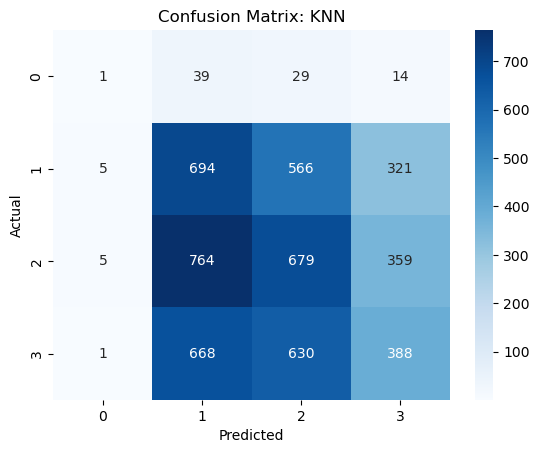

In [8]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))

plot_confusion_matrix(y_test, y_pred, 'KNN')

# K-means

K-means
accuracy: 0.18458260701142745
              precision    recall  f1-score   support

           0       0.01      0.33      0.02        83
           1       0.31      0.58      0.40      1586
           2       1.00      0.00      0.00      1807
           3       1.00      0.00      0.00      1687

    accuracy                           0.18      5163
   macro avg       0.58      0.23      0.11      5163
weighted avg       0.77      0.18      0.12      5163



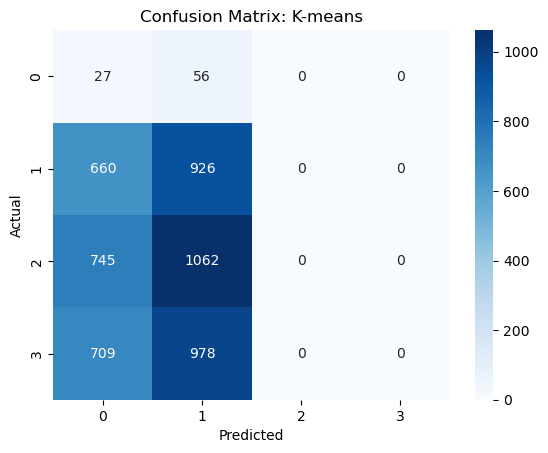

In [9]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X_train)
y_pred = kmeans.predict(X_test)
print("K-means")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))

plot_confusion_matrix(y_test, y_pred, 'K-means')

# Decision Tree

Decision Tree
accuracy: 0.34572922719349214
              precision    recall  f1-score   support

           0       0.06      0.02      0.03        83
           1       0.32      0.36      0.34      1586
           2       0.36      0.36      0.36      1807
           3       0.36      0.33      0.34      1687

    accuracy                           0.35      5163
   macro avg       0.28      0.27      0.27      5163
weighted avg       0.34      0.35      0.34      5163



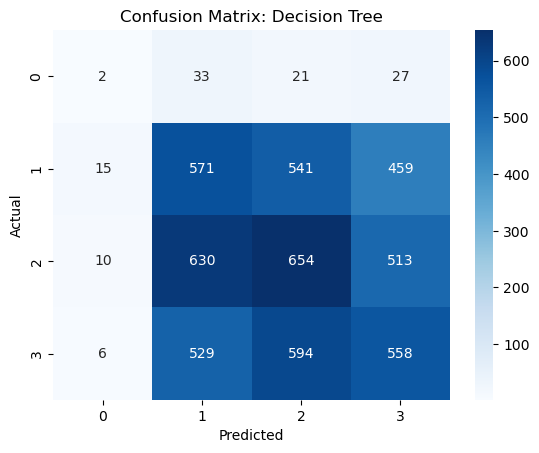

In [10]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))
plot_confusion_matrix(y_test, y_pred, 'Decision Tree')

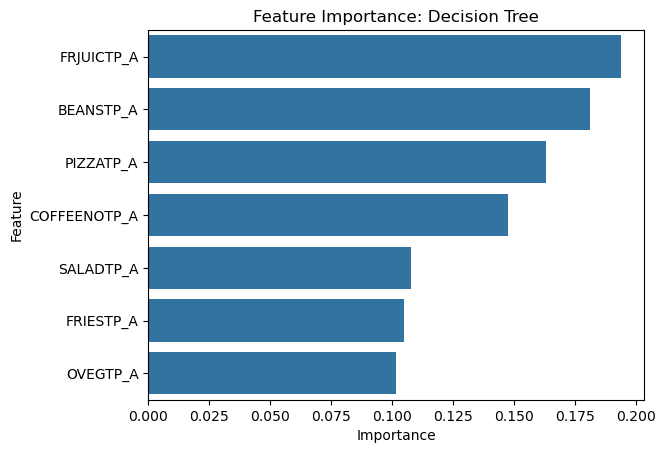

In [11]:
dt_importances = dt.feature_importances_
dt_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': dt_importances})
plot_feature_importance(dt_importance_df, 'Decision Tree')

# Random Forest

Random Forest
accuracy: 0.3453418555103622
              precision    recall  f1-score   support

           0       0.09      0.01      0.02        83
           1       0.33      0.30      0.31      1586
           2       0.36      0.38      0.37      1807
           3       0.35      0.37      0.36      1687

    accuracy                           0.35      5163
   macro avg       0.28      0.26      0.27      5163
weighted avg       0.34      0.35      0.34      5163



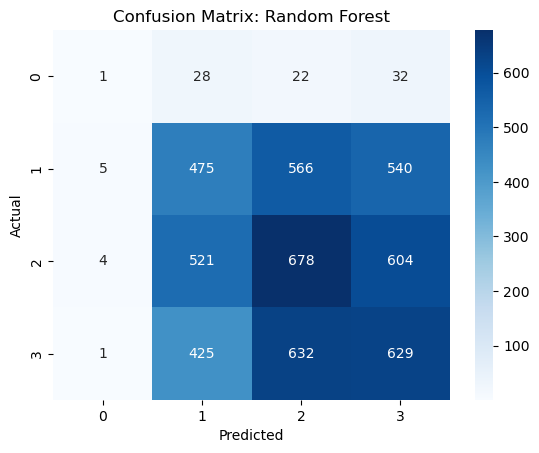

In [12]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))
plot_confusion_matrix(y_test, y_pred, 'Random Forest')

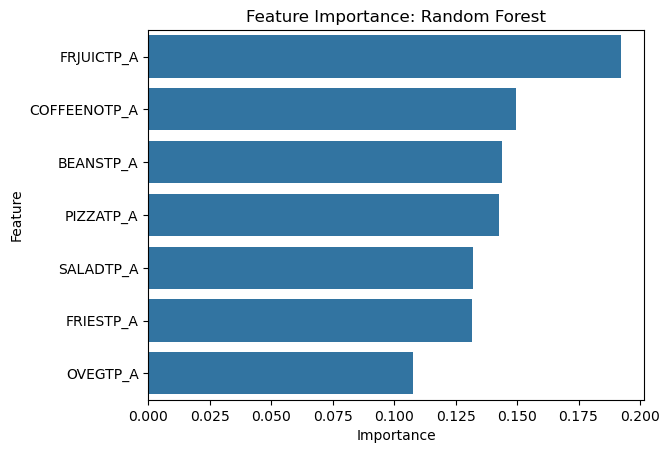

In [13]:
rf_importances = rf.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importances})
plot_feature_importance(rf_importance_df, 'Random Forest')

# CatBoost

CatBoost
accuracy: 0.35037768739105174
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.33      0.29      0.31      1586
           2       0.36      0.41      0.38      1807
           3       0.36      0.37      0.36      1687

    accuracy                           0.35      5163
   macro avg       0.26      0.27      0.26      5163
weighted avg       0.34      0.35      0.35      5163



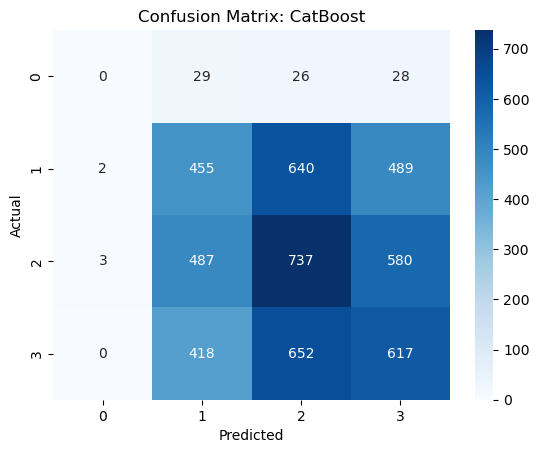

In [14]:
catboost = CatBoostClassifier(verbose=0)
catboost.fit(X_train, y_train)
y_pred = catboost.predict(X_test)
print("CatBoost")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))
plot_confusion_matrix(y_test, y_pred, 'CatBoost')

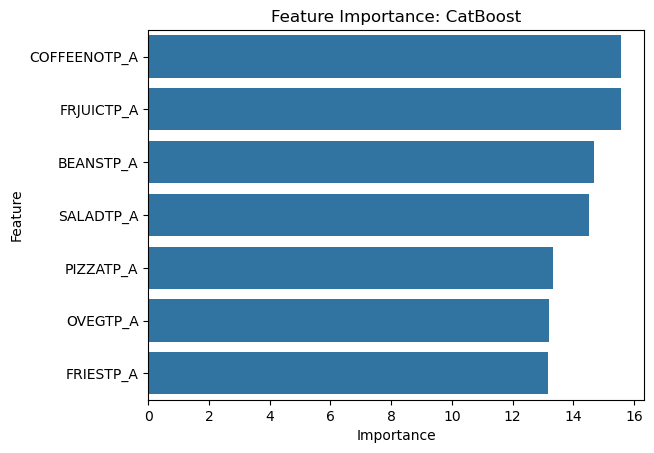

In [15]:
catboost_importances = catboost.get_feature_importance()
catboost_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': catboost_importances})
plot_feature_importance(catboost_importance_df, 'CatBoost')

# Ordered Logistic Regression

In [16]:
# log_reg = LogisticRegression(max_iter=1000)
# log_reg.fit(X_train, y_train)
# coefficients = log_reg.coef_[0]
# coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
# coef_df['Correlation'] = coef_df['Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
# coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
# print(coef_df.sort_values(by='Coefficient', ascending=False))
# sns.barplot(x='Coefficient', y='Feature', hue='Correlation', data=coef_df)
# plt.title('Feature Coefficients from Logistic Regression')
# plt.show()

In [19]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = OrderedModel(y_train, X_train, distr='logit')
result = model.fit(method='bfgs')
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.158144
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
                             OrderedModel Results                             
Dep. Variable:               BMICAT_A   Log-Likelihood:                -23918.
Model:                   OrderedModel   AIC:                         4.786e+04
Method:            Maximum Likelihood   BIC:                         4.794e+04
Date:                Fri, 19 Jul 2024                                         
Time:                        14:53:13                                         
No. Observations:               20652                                         
Df Residuals:                   20642                                         
Df Model:                           7                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [21]:

y_pred = result.predict(X_test)
y_pred_class = y_pred.argmax(axis=1)


accuracy = (y_pred_class == y_test).mean()
print(f'accuracy: {accuracy}')

from sklearn.metrics import classification_report, confusion_matrix



accuracy: 0.36335463877590546


              precision    recall  f1-score   support

           0       1.00      0.00      0.00        83
           1       0.36      0.28      0.31      1586
           2       0.36      0.44      0.40      1807
           3       0.37      0.38      0.38      1687

    accuracy                           0.36      5163
   macro avg       0.52      0.27      0.27      5163
weighted avg       0.37      0.36      0.36      5163



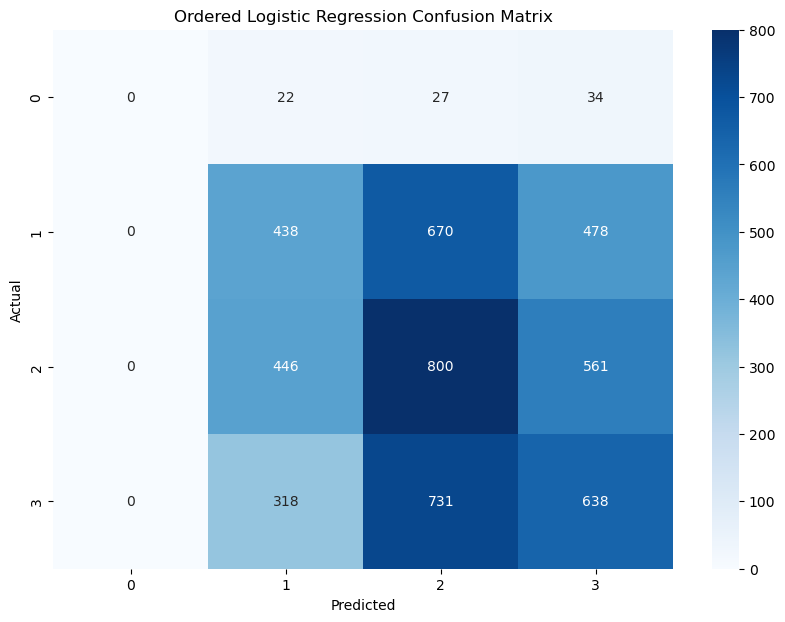

In [22]:
print(classification_report(y_test, y_pred_class, zero_division=1))

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_test, y_pred_class, "Ordered Logistic Regression Confusion Matrix")

Optimization terminated successfully.
         Current function value: 1.158144
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
                             OrderedModel Results                             
Dep. Variable:               BMICAT_A   Log-Likelihood:                -23918.
Model:                   OrderedModel   AIC:                         4.786e+04
Method:            Maximum Likelihood   BIC:                         4.794e+04
Date:                Fri, 19 Jul 2024                                         
Time:                        15:10:29                                         
No. Observations:               20652                                         
Df Residuals:                   20642                                         
Df Model:                           7                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

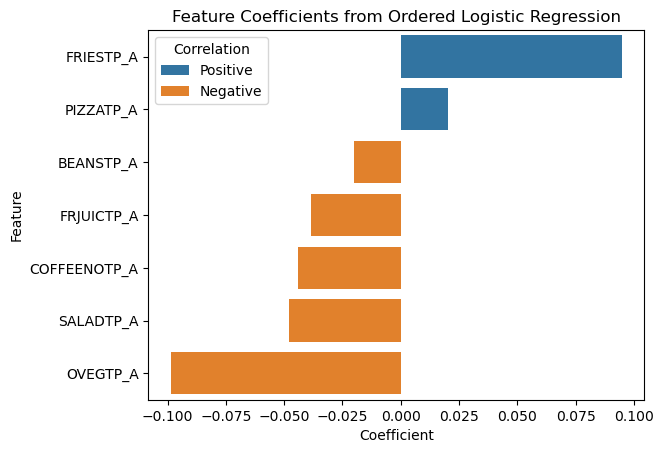

accuracy: 0.36335463877590546
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        83
           1       0.36      0.28      0.31      1586
           2       0.36      0.44      0.40      1807
           3       0.37      0.38      0.38      1687

    accuracy                           0.36      5163
   macro avg       0.52      0.27      0.27      5163
weighted avg       0.37      0.36      0.36      5163



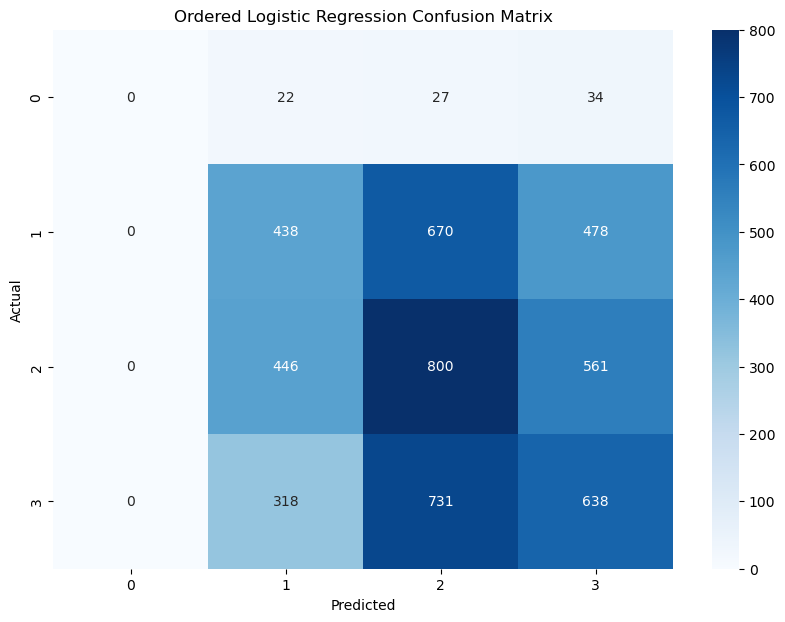

In [24]:
model = OrderedModel(y_train, X_train, distr='logit')
result = model.fit(method='bfgs')
print(result.summary())

params = result.params
feature_names = df_selected.columns.drop('BMICAT_A')
coefficients = params[:len(feature_names)]

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Correlation'] = coef_df['Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)

sns.barplot(x='Coefficient', y='Feature', hue='Correlation', data=coef_df)
plt.title('Feature Coefficients from Ordered Logistic Regression')
plt.show()

y_pred = result.predict(X_test)
y_pred_class = y_pred.argmax(axis=1)

accuracy = (y_pred_class == y_test).mean()
print(f'accuracy: {accuracy}')

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_class, zero_division=1))

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_test, y_pred_class, "Ordered Logistic Regression Confusion Matrix")
